## import modules 

In [1]:
import os
import sys
sys.path.reverse() #look in anaconda paths first
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

from mytools import rankdiag
%matplotlib inline  

In [2]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print "New size:", fig_size

Current size: [6.0, 4.0]
New size: [18, 9]


## Load data

### Directory and experiment definition

In [3]:
exp_name = '02'
datadir = os.path.abspath('../data')
expdir = os.path.join(datadir,'EXP' + exp_name)
Nens = 20

### Load reference


In [4]:
#true state
x= 20
y= 0
fname = 'state_true_0.nc'
fh0 = Dataset(os.path.join(expdir,'output',fname))
h0 = fh0.variables['Hfil'][:,:,:]
fh0.close()

fname='obs_per_0.dat'
fid = open(os.path.join(expdir,'output',fname))
L=fid.readline()
n=int(L[1:])
print n

obs = dict()

for i in range(n):
    L=fid.readline()
    Ls = L.split()
    coord = tuple([int(li) for li in Ls[:-1]])
    val = float(Ls[-1])
    obs[coord]=val
fid.close()

100000


## Plot a point trajectory

In [5]:
#load 
x= 30
y = 20
t = range(0,h0.shape[0])

cobs = [[to,val] for (xo,yo,to),val in obs.iteritems() if xo==x and yo==y]
tobs=[]
vobs=[]
for cc in cobs:
    tobs.append(cc[0])
    vobs.append(cc[1])

h=np.zeros([Nens,h0.shape[0],h0.shape[1],h0.shape[2]])
for i in range(Nens):
    fname = 'state_ret_'+str(i+1)+'.nc'
    fh = Dataset(os.path.join(expdir,'output',fname))
    h[i,:,:,:]=fh.variables['Hfil'][:,:,:]
    #h.append(fh.variables['Hfil'][:,x,y])
#    plt.plot(t,h[i],color='gray')
    fh.close()
#plt.plot(t,h0[:,x,y],color='red')
#plt.plot(tobs,vobs,color='magenta',marker='+',linestyle='none')
#plt.show()
hmean = np.mean(h,axis=0)

In [14]:
h[0,:,y,x].shape

(1462,)

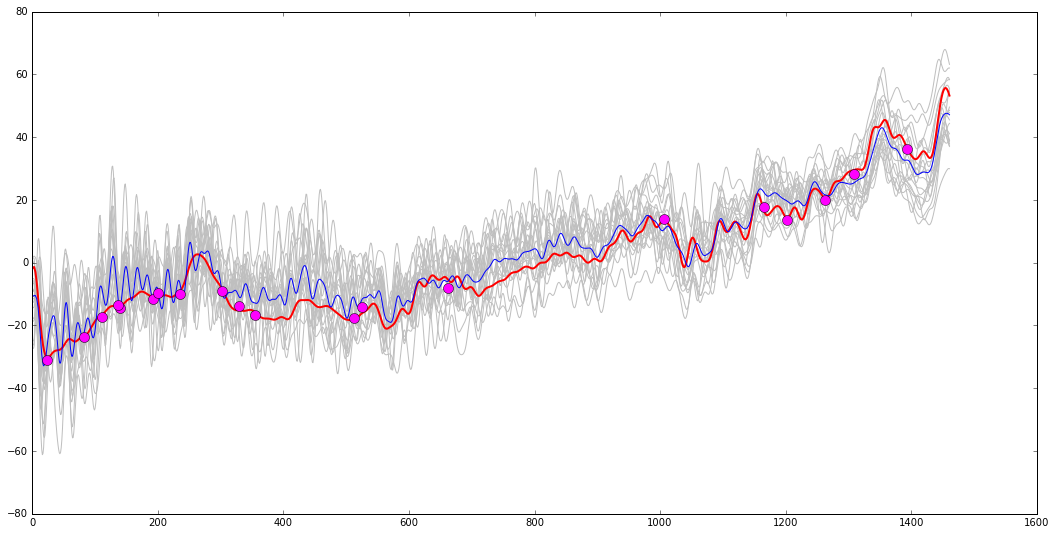

In [6]:
#plot 
t = range(0,h0.shape[0])
for i in range(Nens):
    plt.plot(t,h[i,:,y,x],color='0.75')
plt.plot(t,h0[:,y,x],color='red',linewidth=2)
plt.plot(t,hmean[:,y,x],color='blue')
plt.plot(tobs,vobs,color='magenta',marker='o',markersize=10,linestyle='none')
plt.savefig('trajectory_x' + str(x) + '_y' + str(y) + '.png')
plt.show()

## Show state

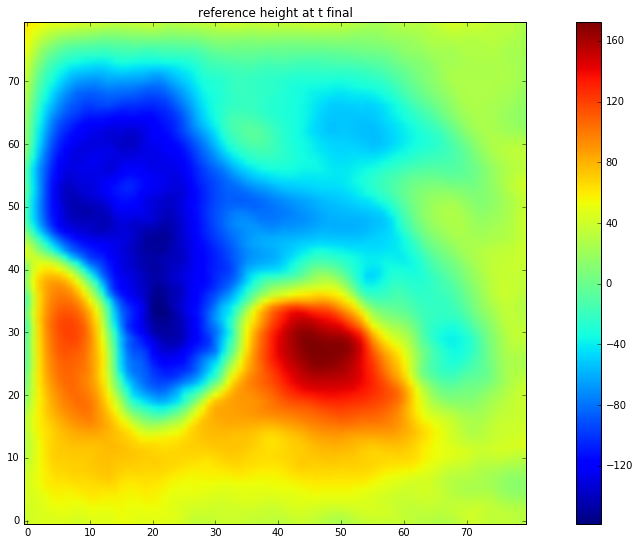

In [10]:
t=-1
plt.imshow(h0[t,:,:])
plt.colorbar()
plt.title('reference height at t final')
plt.gca().invert_yaxis()
plt.savefig('href_fin.png')
plt.show()


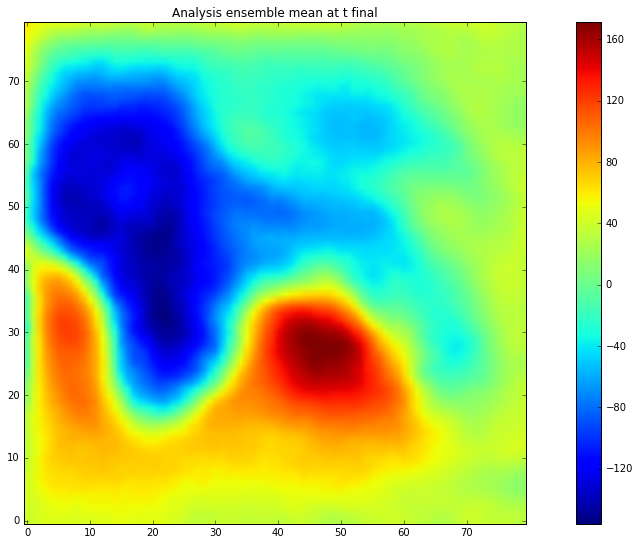

In [11]:
t=-1
plt.imshow(hmean[t,:,:])
plt.colorbar()
plt.title('Analysis ensemble mean at t final')
plt.gca().invert_yaxis()
plt.savefig('hmean_fin.png')

plt.show()


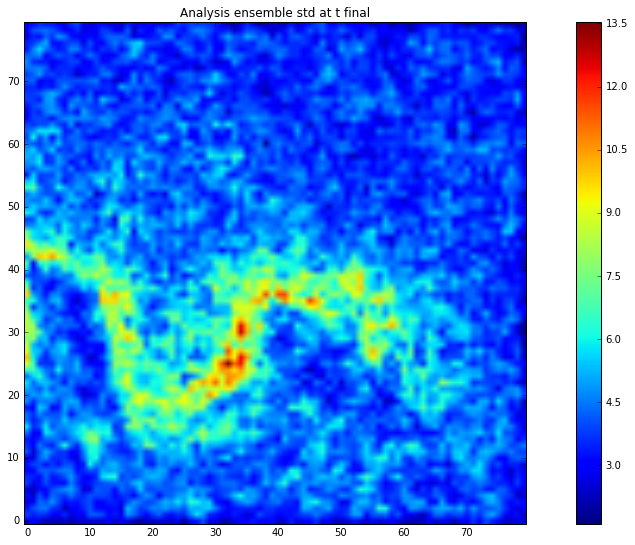

In [13]:
t=-1
hstd = np.std(h,axis=0)
plt.imshow(hstd[t,:,:])
plt.colorbar()
plt.title('Analysis ensemble std at t final')
plt.gca().invert_yaxis()
plt.savefig('hstd_fin.png')

plt.show()


In [ ]:
fname = 'state_true.nc'
fh = Dataset(fname, mode='r')
hfilt = fh.variables['Hfil'][:,:,:]
fh.close()

In [ ]:
fname = 'state_4dvar.nc'
fh = Dataset(fname, mode='r')
hfila = fh.variables['Hfil'][:,:,:]
fh.close()

In [ ]:
fname = 'state_bck.nc'
fh = Dataset(fname, mode='r')
hfilb = fh.variables['Hfil'][:,:,:]
fh.close()

## obs

In [ ]:
fname_head = 'obs.dat'
fname='obs_val.dat'
fid = open(fname_head)
L=fid.readline()
n=int(L[1:])
print n
fid.close()

fid = open(fname)

obs = dict()

for i in range(n):
    L=fid.readline()
    Ls = L.split()
    coord = tuple([int(li) for li in Ls[:-1]])
    val = float(Ls[-1])
    obs[coord]=val
fid.close()

###  4dvar

In [ ]:
nfig =3
t=1000

fig, ax = plt.subplots(ncols=nfig,nrows=2)
im=np.array(ax)
im[0,0] = ax[0,0].imshow(hfilt[t,:,:])
im[0,1] = ax[0,1].imshow(hfila[t,:,:])
im[0,2] = ax[0,2].imshow(hfila[t,:,:]-hfilt[t,:,:])
im[1,0] = ax[1,0].imshow(hfilb[t,:,:])
im[1,1] = ax[1,1].imshow(hfilt[t,:,:]-hfilb[t,:,:])
im[1,2] = ax[1,2].imshow(hfilb[t,:,:]-hfila[t,:,:])



#plt.subplots_adjust(bottom=0.2)
for (i,j),cax in np.ndenumerate(ax):
    #print i,j
    pos = cax.get_position()
    cax.set_position([pos.x0, pos.y0+0.1, pos.width, pos.height-0.1])
    cbar_ax = fig.add_axes([pos.x0, 0.15, pos.width, 0.05])
    #cbar_ax=fig.add_axes([1, pos.y0, 0.05, pos.height])
    plt.colorbar(im[i,j],orientation='horizontal',cax=cbar_ax)
    cax.invert_yaxis()
plt.show()



In [ ]:
t = range(0,hfilt.shape[0])
y=obs.keys()[1000][0]
x=obs.keys()[1000][1]
print 'x=',x,' y=',y
plt.plot(t,hfilt[:,x,y],color='red')
plt.plot(t,hfila[:,x,y],color='blue')
plt.plot(t,hfilb[:,x,y],color='green')
cobs = [[to,val] for (yo,xo,to),val in obs.iteritems() if xo==x and yo==y]
tobs=[]
vobs=[]
for cc in cobs:
    tobs.append(cc[0])
    vobs.append(cc[1])
plt.plot(tobs,vobs,color='magenta',marker='+',linestyle='none')
print tobs,vobs
plt.show()


## Cost function

In [ ]:
!awk '($1=="m1qn3:" && $6=="f=") {print $3,$7}' tmp > essai
fid = open('essai')
cost=np.array([])
for lignes in fid:
    s = lignes.replace(',',' ')
    s = s.replace('D','E')
    l=s.split()
    nl=np.array([float(l[0]),float(l[1])])
    #print nl
    cost=np.append(cost,nl)
cost.resize((len(cost)/2,2))
plt.plot(cost[:,0],cost[:,1],color='black')

fid.close()
print cost[-1,1]


In [ ]:
rcoef = 1
bcoef = 0.0625
Jobsxa = rcoef* np.sum((hfila[to,xo,yo]-val)**2 for (yo,xo,to),val in obs.iteritems())
Jbckxa = bcoef * np.sum((hfila[0,:,:]-hfilb[0,:,:])**2)
print Jobsxa
print Jbckxa
nobs = hfilt.shape[1]*hfilt.shape[2] + len(obs)
print 'nobs=',nobs, ' 2J(xa)=', Jobsxa+Jbckxa

## RMS

In [ ]:
t = range(0,hfilt.shape[0])
rmsa=np.zeros(len(t))
rmsb=np.zeros(len(t))
n=hfilt.shape[1]*hfilt.shape[2]
for it in t:
    rmsa[it]=np.sqrt((1.0/n)*sum((hfilt[it,:,:].ravel()-hfila[it,:,:].ravel())**2))
    rmsb[it]=np.sqrt((1.0/n)*sum((hfilt[it,:,:].ravel()-hfilb[it,:,:].ravel())**2))


In [ ]:
plt.plot(t,rmsa,color='blue')
plt.plot(t,rmsb,color='green')
plt.show()

## Rank diagram

In [ ]:
#vector xtrue
xt = hfilt.ravel()
xa = hfila.ravel()
xb = hfilb.ravel()

#percentiles
q = range(0,100,10)
v = np.percentile(xt,q)
va = np.zeros(len(q)-1)
vt = np.zeros(len(q)-1)
vb = np.zeros(len(q)-1)

for i in range(0,len(q)-1):
    vt[i]=((v[i] <= xt) & (xt < v[i+1])).sum()
    va[i]=((v[i] <= xa) & (xa < v[i+1])).sum()
    vb[i]=((v[i] <= xb) & (xb < v[i+1])).sum()
    
#add extremes valuers
vt[0]=(xt < v[0]).sum()
vt[-1]=(v[-1] <= xt).sum()

vt[0]=(xt < v[0]).sum()
vt[-1]=(v[-1] <= xt).sum()

vt[0]=(xt < v[0]).sum()
vt[-1]=(v[-1] <= xt).sum()


In [ ]:
#vector xtrue
t=-1
xt = hfilt[t,:,:].ravel()
xa = hfila[t,:,:].ravel()
xb = hfilb[t,:,:].ravel()

#percentiles
q = range(0,100,1)
vt = rankdiag(q,xt,xt)
va = rankdiag(q,xt,xa)
vb = rankdiag(q,xt,xb)



In [ ]:
plt.bar(range(len(q)-1),va)
plt.show()